In [4]:
#Import libraries

In [5]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib
#Customize background and pallete colors 
sns.set_style("darkgrid")
#ncol = len(phy_norm.T.columns)
from matplotlib import cm
ncol=21
values = np.linspace(0,1, ncol)
#colors_ = cm.Paired(values)
colors_=cm.tab20(values)

# MEBS in time  

### Comand line of MEBS 

Example comand line of mebs in the metagenomic dataset containing 12  microbial mat metagenomes 


```
perl mebsv1.pl  -input mats_fasta -type metagenomic -fdr 0.0001 > mats.fasta.tsv
```

### MEBS output  

```
head  mats.fasta.tsv 
        sulfur  carbon  oxygen  iron    nitrogen
S9__metahit.final.contigs.fa.prodigal.faa       8.714*  35.156* 6.853   9.3
S8__metahit.final.contigs.fa.prodigal.faa       8.535*  42.132* 6.839   9.3
S6__metahit.final.contigs.fa.prodigal.faa       8.262*  33.394  6.839   9.3
S3_metahit.final.contigs.fa.prodigal.faa        9.085*  29.336  6.839   9.3
```


###  Parsing the output 

In [3]:
%%bash 

sed 's/__metahit.final.contigs.fa.prodigal.faa//g' ../data/mats.fasta.tsv   | sed 's/_metahit.final.contigs.fa.prodigal.faa//g'  | sed 's/\*//g'> mats.fasta.2plot.tab
head mats.fasta.2plot.tab


	sulfur	carbon	oxygen	iron	nitrogen
S9	8.714	35.156	6.853	9.391	19.180
S8	8.535	42.132	6.839	9.391	19.226
S6	8.262	33.394	6.839	9.391	18.785
S3	9.085	29.336	6.839	9.391	19.048
S7	8.901	42.838	6.839	9.391	19.226
S5	8.989	35.881	6.839	9.391	19.226
S12	8.901	37.170	6.839	9.391	19.226
S1	8.505	36.301	6.839	9.391	19.031


### Convert to a pandas dataframe 

In [7]:
scores=pd.read_table("mats.fasta.2plot.tab",index_col=0)
scores.head()

,sulfur,carbon,oxygen,iron,nitrogen
S9,8.714,35.156,6.853,9.391,19.180
S8,8.535,42.132,6.839,9.391,19.226
S6,8.262,33.394,6.839,9.391,18.785
S3,9.085,29.336,6.839,9.391,19.048
S7,8.901,42.838,6.839,9.391,19.226


### Generate a metadata file 
The sample names must be the same

In [9]:
ids=pd.read_table("../data/samples_id.tab",index_col=0)
ids.head()

,Time,Site
Sample,,
S1,Autumn 12,A
S2,Autumn 12,B
S3,Autumn 12,C
S4,Spring 13,A
S5,Spring 13,B


### Concatenate into a single file 

In [11]:
concat=pd.concat([ids, scores],axis=1)
concat.head()

,Time,Site,sulfur,carbon,oxygen,iron,nitrogen
S1,Autumn 12,A,8.505,36.301,6.839,9.391,19.031
S10,Spring 14,A,8.763,40.041,6.554,9.391,18.946
S11,Spring 14,B,8.763,40.041,6.554,9.391,18.826
S12,Spring 14,C,8.901,37.170,6.839,9.391,19.226
S2,Autumn 12,B,8.831,36.355,6.135,9.339,18.829


### Plot scores


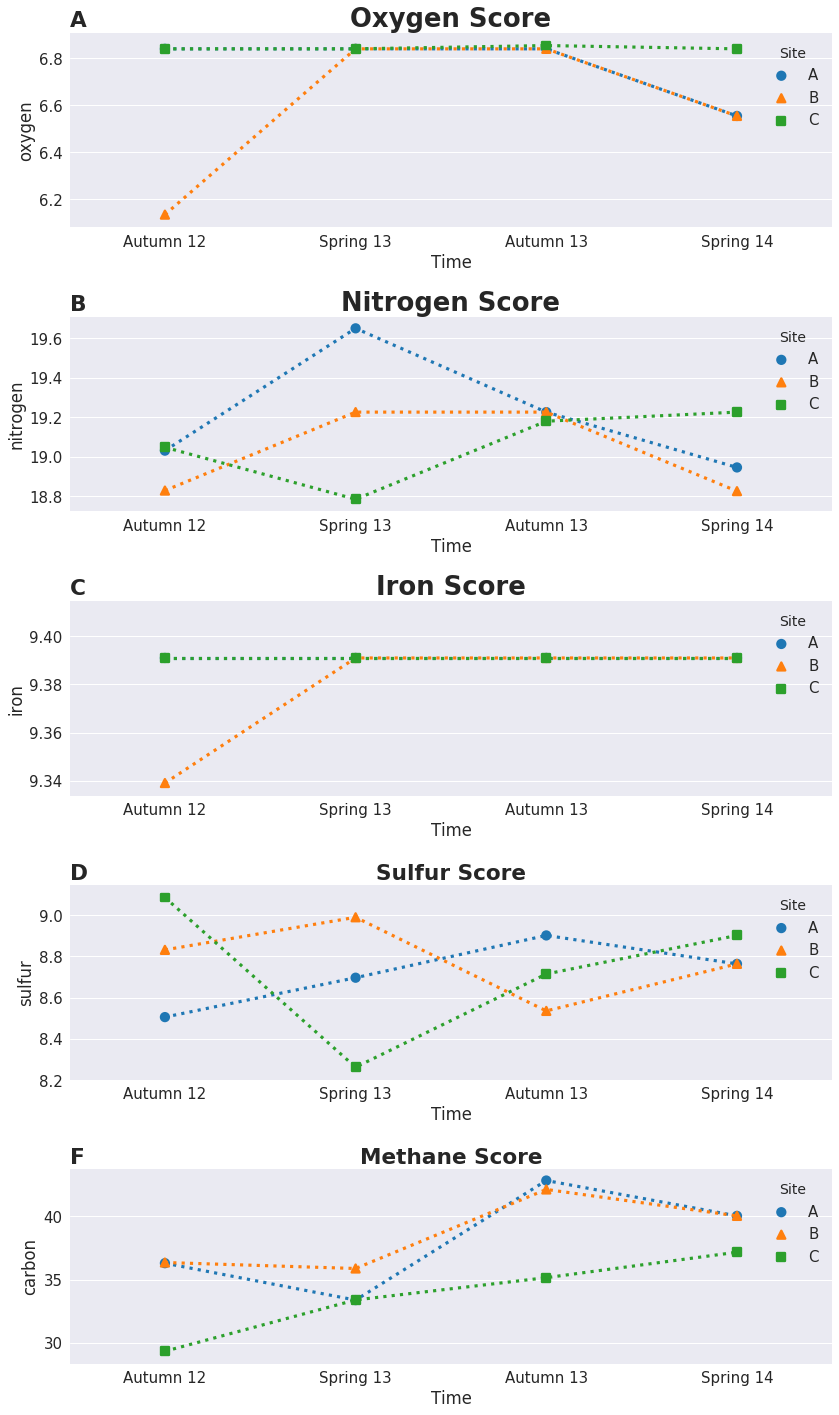

In [16]:
sns.set(font_scale=1.5)
X = 12
Y = 20

fig = plt.figure(figsize=(X, Y))


#############################################
plt.subplot(511)
ax=sns.pointplot(x="Time", y="oxygen", hue="Site", data=concat, 
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"], palette="tab10")

plt.title("A",loc='left',weight='bold',size='large')
plt.title("Oxygen Score",weight='bold',size='x-large')
plt.tight_layout()
#############################################
plt.subplot(512)
ax=sns.pointplot(x="Time", y="nitrogen", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10")
plt.title("B",loc='left',weight='bold',size='large')
plt.title("Nitrogen Score",weight='bold',size='x-large')
plt.tight_layout()
#############################################
plt.subplot(513)
ax=sns.pointplot(x="Time", y="iron", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10")
plt.title("C",loc='left',weight='bold',size='large')
plt.title("Iron Score",weight='bold',size='x-large')
plt.tight_layout()
#############################################
plt.subplot(514)
ax=sns.pointplot(x="Time", y="sulfur", hue="Site", data=concat, 
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10"),
plt.title("D",loc='left',weight='bold',size='large')
plt.title("Sulfur Score",weight='bold',size='large')
plt.tight_layout()
#############################################
plt.subplot(515)
ax=sns.pointplot(x="Time", y="carbon", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10",)
plt.title("F",loc='left',weight='bold',size='large')
plt.title("Methane Score",weight='bold',size='large')
plt.tight_layout()

plt.savefig("../figures/MEBS_mats.png",bbox_inches='tight',dpi=300)